In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout as dropout

In [3]:
import kagglehub  #This script downloads the Animals-10 dataset from Kaggle using the kagglehub library.
path = kagglehub.dataset_download("alessiocorrado99/animals10")

In [ ]:
!pip install split-folders
import splitfolders

splitfolders.ratio(
    input=path,
    output="/data/split_animals10",
    seed=1337,
    ratio=(.7, .2, .1)  # 70% train, 20% val, 10% test
    )

Copying files: 26179 files [06:21, 68.54 files/s]


In [ ]:
train_path = "/data/split_animals10/train"
val_path = "/data/split_animals10/val"

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_path, target_size=(150,150), batch_size=32, class_mode='categorical')
val_data = val_gen.flow_from_directory(val_path, target_size=(150,150), batch_size=32, class_mode='categorical')

Found 18322 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
Found 2625 images belonging to 10 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,        # Stop if no improvement for 10 epochs
    restore_best_weights=True
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 165s 273ms/step - accuracy: 0.3095 - loss: 1.9688 - val_accuracy: 0.5004 - val_loss: 1.4655
Epoch 2/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 104s 182ms/step - accuracy: 0.5370 - loss: 1.3702 - val_accuracy: 0.5657 - val_loss: 1.2822
Epoch 3/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 162s 217ms/step - accuracy: 0.6180 - loss: 1.1391 - val_accuracy: 0.6128 - val_loss: 1.1536
Epoch 4/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 104s 182ms/step - accuracy: 0.6795 - loss: 0.9284 - val_accuracy: 0.6294 - val_loss: 1.1165
Epoch 5/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 102s 178ms/step - accuracy: 0.7290 - loss: 0.7956 - val_accuracy: 0.6560 - val_loss: 1.0591
Epoch 6/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 104s 182ms/step - accuracy: 0.7754 - loss: 0.6580 - val_accuracy: 0.6705 - val_loss: 1.0847
Epoch 7/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 101s 177ms/step - accuracy: 0.8112 - loss: 0.5422 - val_accuracy: 0.6466 - val_loss: 1.1792
Epoch 8/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 104s 182ms/step - accuracy: 0.8483 -

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,488,928 (55.27 MB)

 Trainable params: 4,829,642 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,659,286 (36.85 MB)

In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 154ms/step - accuracy: 0.6641 - loss: 1.0151
Test Loss: 1.0118
Test Accuracy: 0.6575


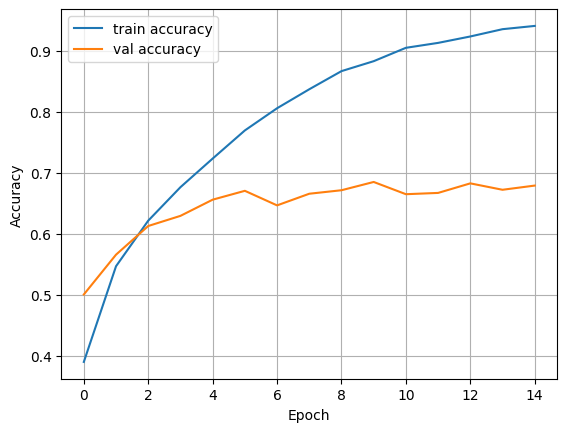

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


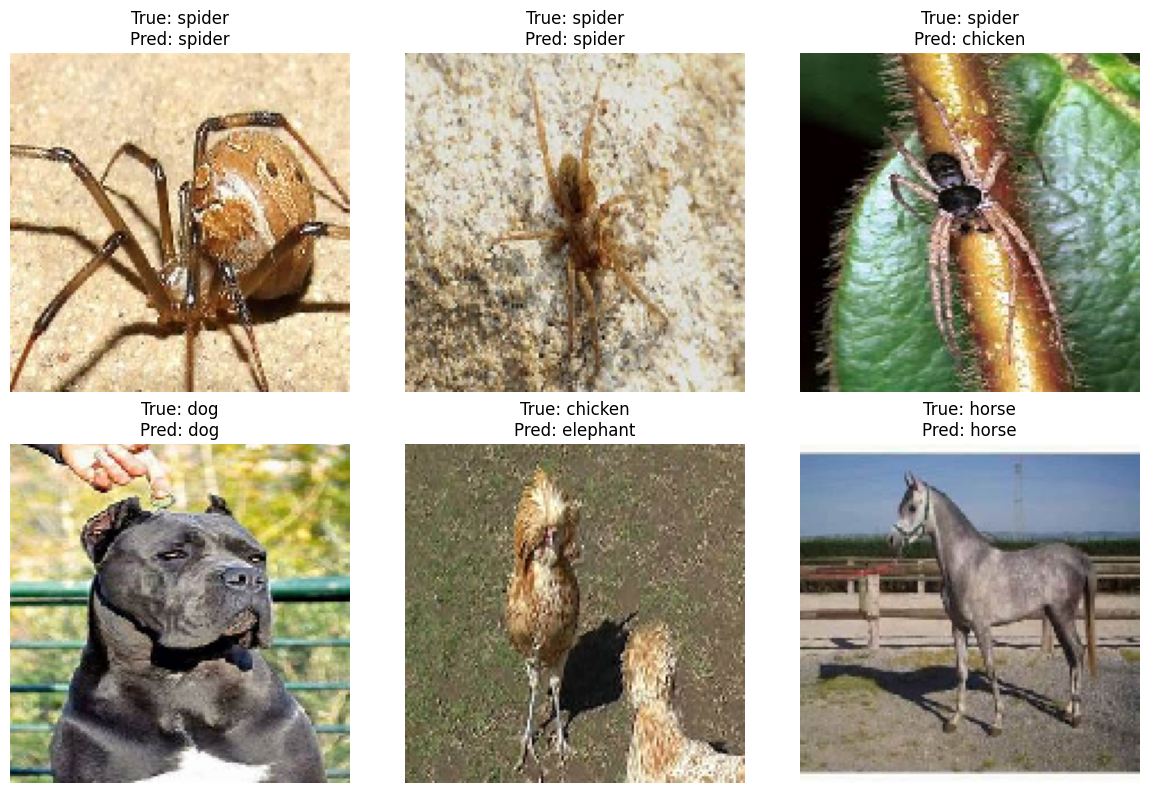

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

test_path = "/data/split_animals10/test"
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(test_path, target_size=(150,150), batch_size=32, class_mode='categorical')

class_labels = list(test_data.class_indices.keys())

italian_to_english = {
    'cane': 'dog',
    'cavallo': 'horse',
    'elefante': 'elephant',
    'farfalla': 'butterfly',
    'gallina': 'chicken',
    'gatto': 'cat',
    'mucca': 'cow',
    'pecora': 'sheep',
    'ragno': 'spider',
    'scoiattolo': 'squirrel'
}

class_labels = [italian_to_english[label] for label in class_labels]

images, true_labels = next(test_data)
pred_probs = model.predict(images)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(true_labels, axis=1)

# Plot first 6 images with predictions
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[pred_classes[i]]}")
plt.tight_layout()
plt.show()

In [ ]:
model.save("content/drive/MyDrive/split_animals10/model.h5")